## Visualizing Systemic Risk in a Complex System with Stress using Python and Matplotlib

To understand the systemic risk in a complex system and the effects of stress on this system, we'll employ Python and matplotlib for a visual demonstration. Our system is represented using two interrelated variables, making use of a bivariate normal distribution to demonstrate their relationship.

1. **System Representation**:
   - The complex system is represented by a bivariate normal distribution with specified means and covariance. Here, the mean vector `mean` denotes the average values of the two random variables, and the covariance matrix `cov` signifies how these variables interact with each other.

2. **Modeling Stress**:
   - Stress on the system is modeled using the `apply_stress` function. This function shifts the mean values, simulating a disturbance. By adjusting the `stress_factor` parameter, we can control the intensity of the stress.

3. **Visualization**:
   - Using matplotlib, the original distribution (before stress) is plotted using blue contours, demonstrating the system's behavior in its natural state.
   - Post the application of stress, the disturbed distribution is visualized with red contours, allowing for a comparison between the system's behavior before and after the stress.
   
Through this visualization, one can observe how the introduction of stress affects the systemic risk in the system. The shift between the blue and red contours visually captures the change in the conditional probabilities of the system's variables, demonstrating the resilience or vulnerability of the system to disturbances.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

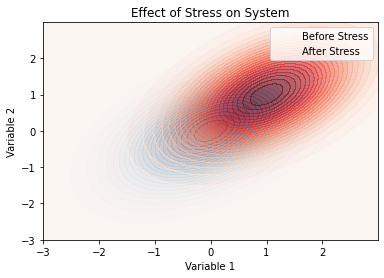

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# 1. Define the multivariate normal distribution for the system variables
# We will assume two variables for simplicity
mean = [0, 0]  # Mean of the two variables
cov = [[1, 0.5], [0.5, 1]]  # Covariance matrix showing some correlation between the variables

# Create a grid of (x, y) coordinates
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# 2. Define a function to "stress" the system. Here, stress is modeled as a change in mean
def apply_stress(original_mean, stress_factor):
    return [m + stress_factor for m in original_mean]

# 3. Plot the distributions before and after stress
fig, ax = plt.subplots()

# Before stress
rv = multivariate_normal(mean, cov)
ax.contourf(x, y, rv.pdf(pos), levels=25, alpha=0.6, cmap="Blues")

# After stress
stressed_mean = apply_stress(mean, 1)  # Apply a stress factor of 1 to change the mean
rv_stressed = multivariate_normal(stressed_mean, cov)
ax.contourf(x, y, rv_stressed.pdf(pos), levels=25, alpha=0.6, cmap="Reds")

ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')
ax.set_title('Effect of Stress on System')
ax.legend(['Before Stress', 'After Stress'])

plt.show()